# Housing Price Prediction ( Linear Regression )

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Load dataset
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# Data Exploration and Cleaning

In [ ]:
df.shape

(545, 13)

In [ ]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Summary statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Handling null values

In [ ]:
# Get the sum of all na values from dataset
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


# Outlier Treatment

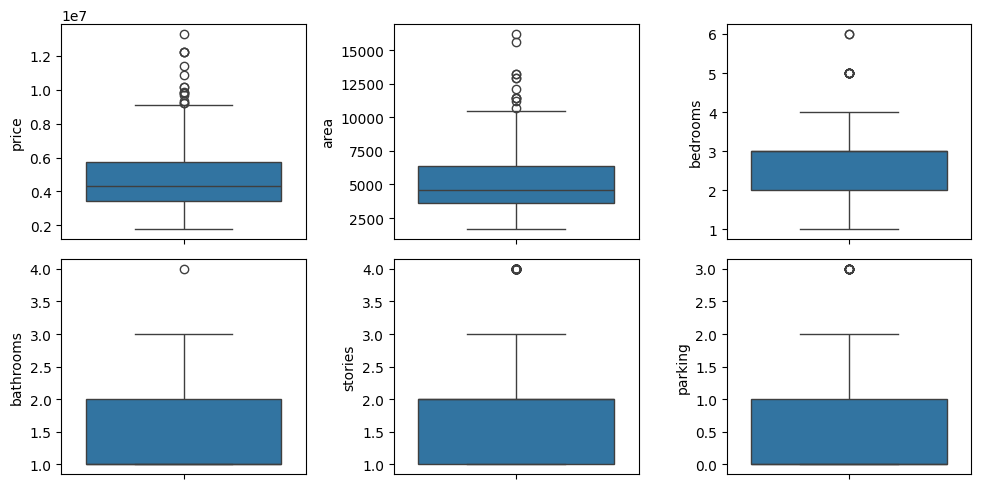

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

In [ ]:
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

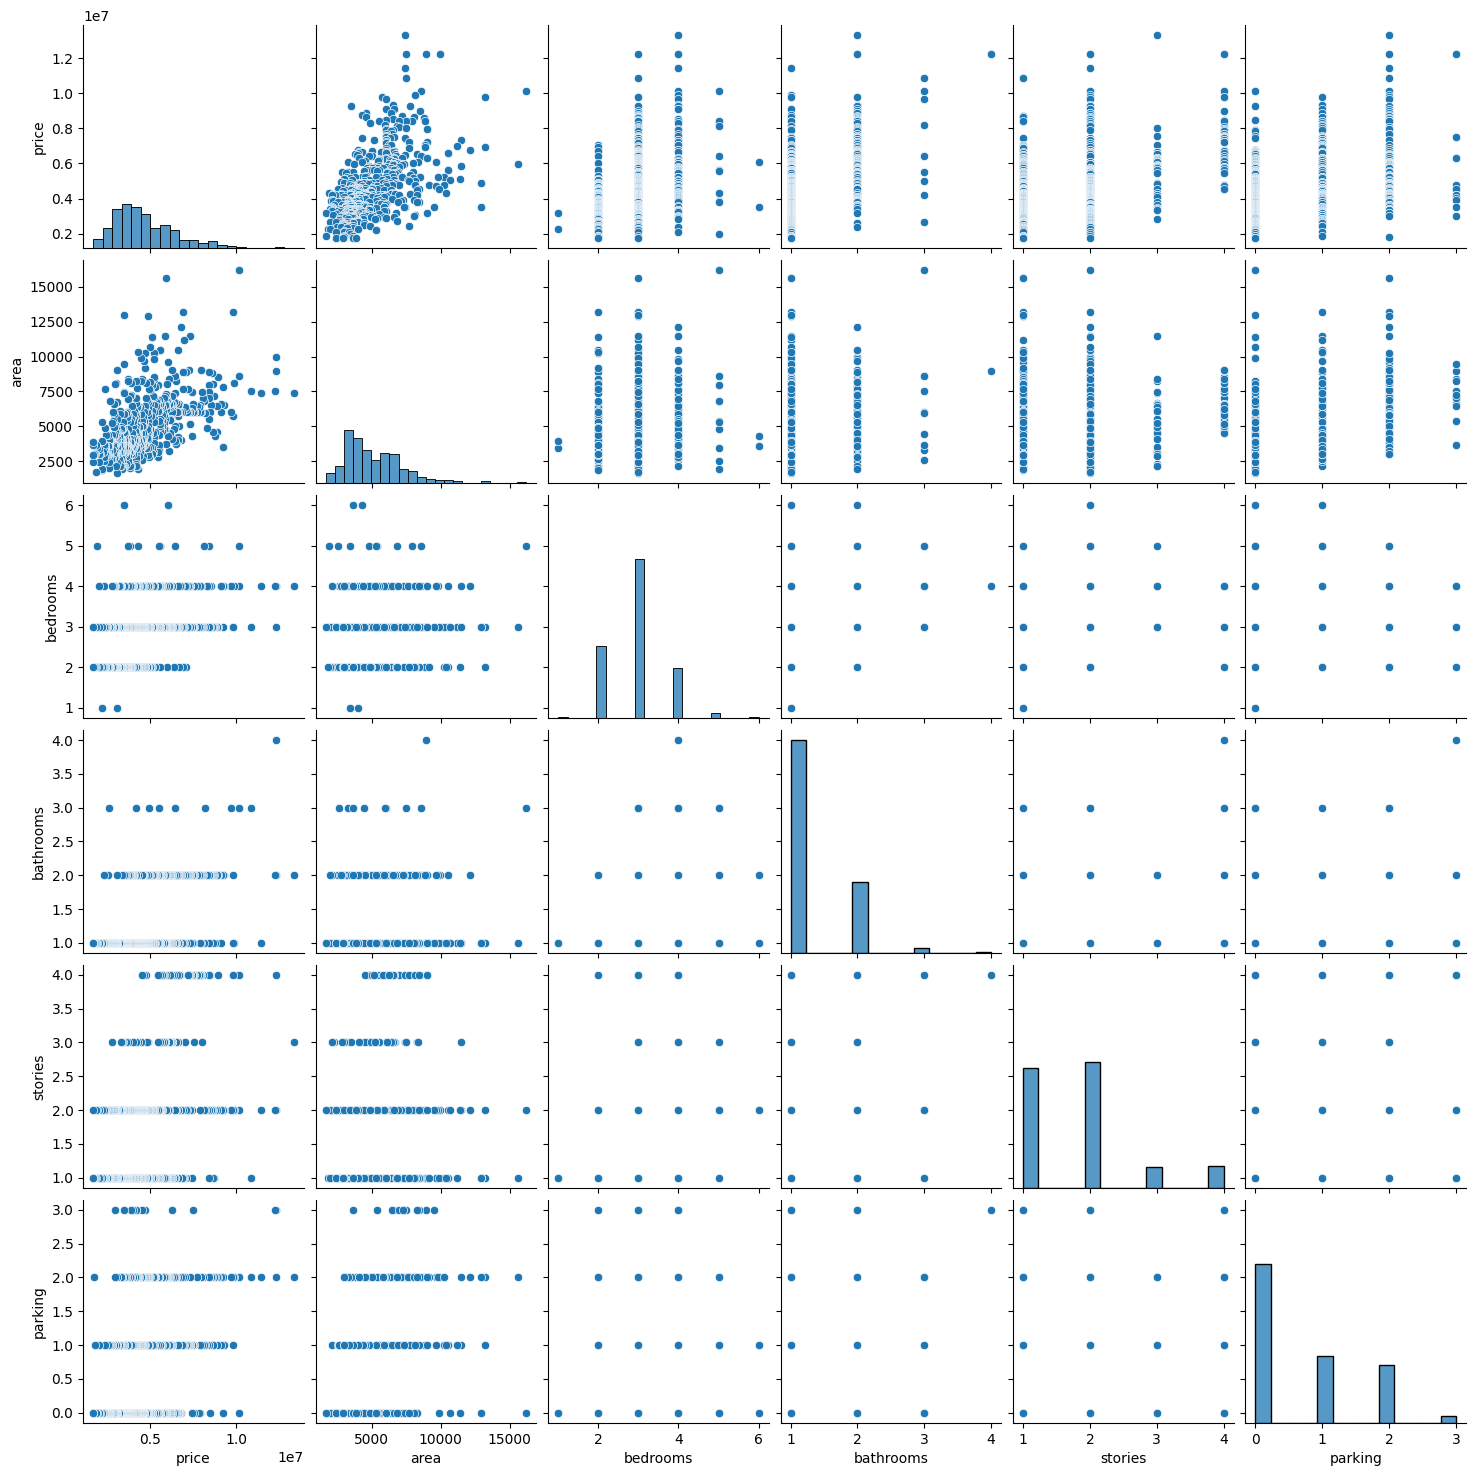

In [ ]:
sns.pairplot(df)


In [ ]:
# Calculate Q1 and Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[( df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Print outliers
print(outliers)

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   9681000   6000         

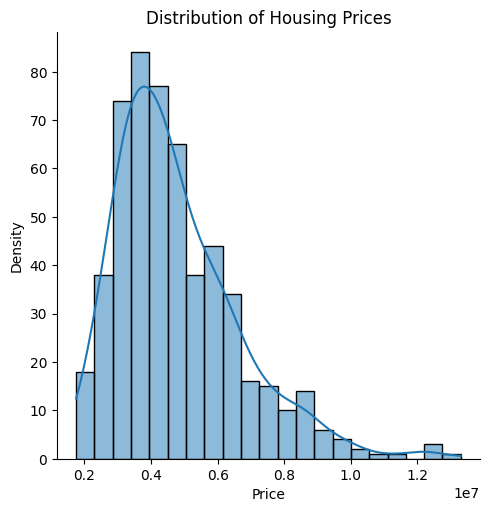

In [ ]:
# Using displot for a distribution plot
sns.displot(df['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Housing Prices')
plt.show()


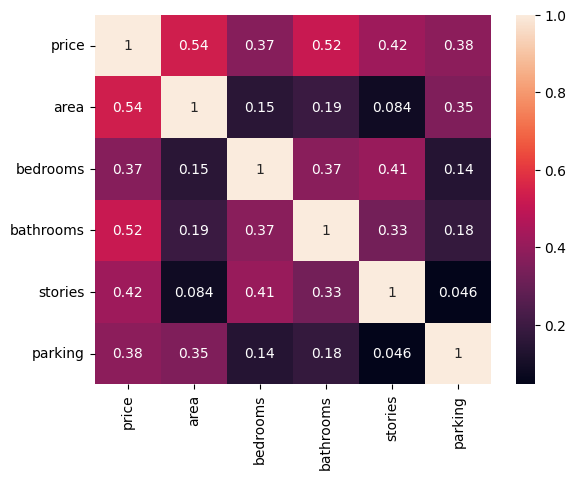

In [ ]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical features
corr_matrix = numerical_df.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Training model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define features and target
X = df.drop('price', axis=1)  # All columns except price
y = df['price']               # Target variable


In [ ]:
print(X.shape)
print(y.shape)

(545, 12)
(545,)


In [ ]:
print(X)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [ ]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [ ]:
# Data Preprocessing
df_processed = df.copy()

In [ ]:
# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    df_processed[col] = le.fit_transform(df_processed[col])


In [ ]:
# Data Exploration
# Basic statistics
print("\nBasic Statistics:")
print(df_processed.describe())


Basic Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min    

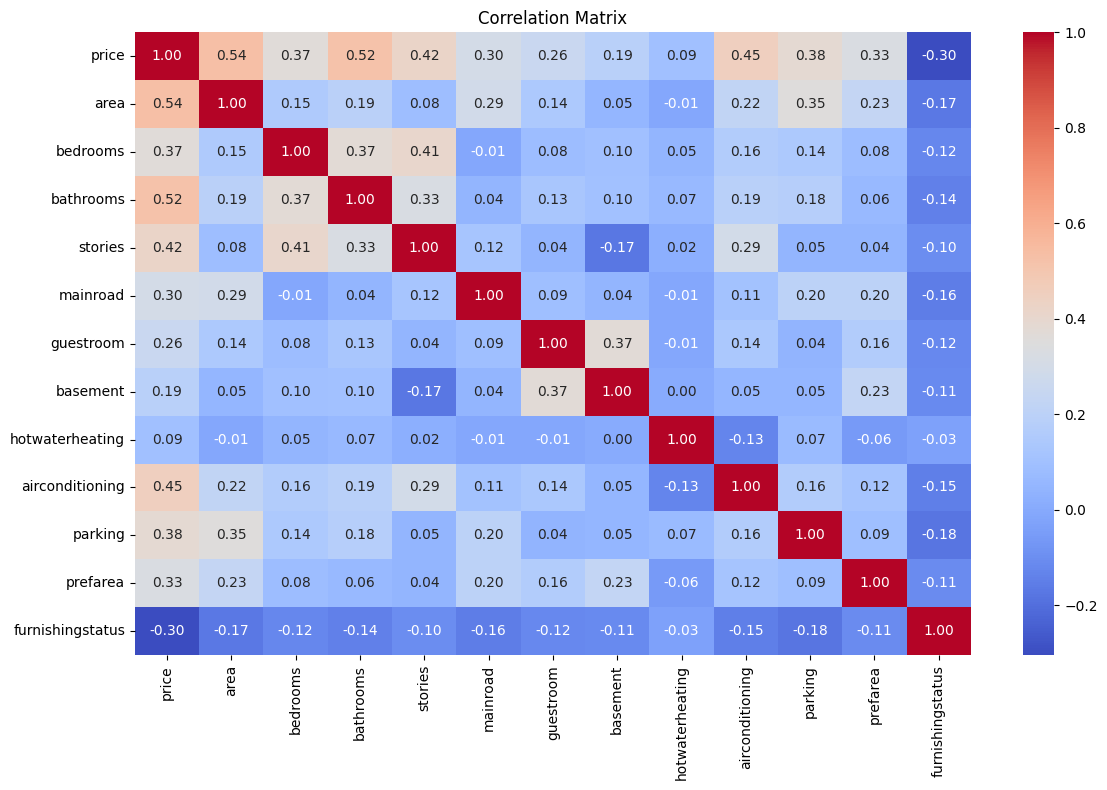

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_processed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

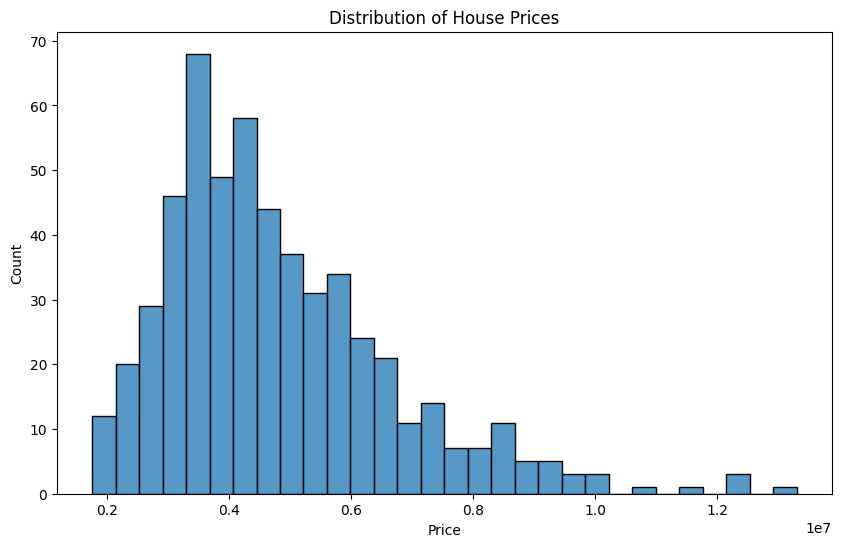

In [ ]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['price'], bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [ ]:
# 3. Splitting Data and Model Training
# Prepare features and target
X = df_processed.drop('price', axis=1)
y = df_processed['price']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [183]:
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
area,2.358488e+02
bedrooms,7.857449e+04
bathrooms,1.097117e+06
stories,4.062232e+05
mainroad,3.668242e+05
guestroom,2.331468e+05
basement,3.931598e+05
hotwaterheating,6.878813e+05
airconditioning,7.855506e+05
parking,2.257565e+05


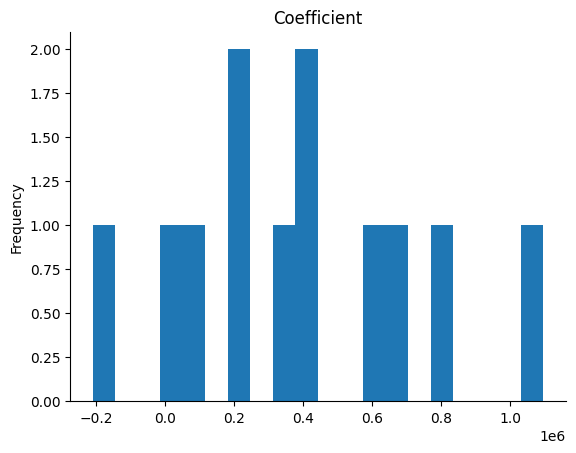

In [ ]:
from matplotlib import pyplot as plt
coeff_df['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

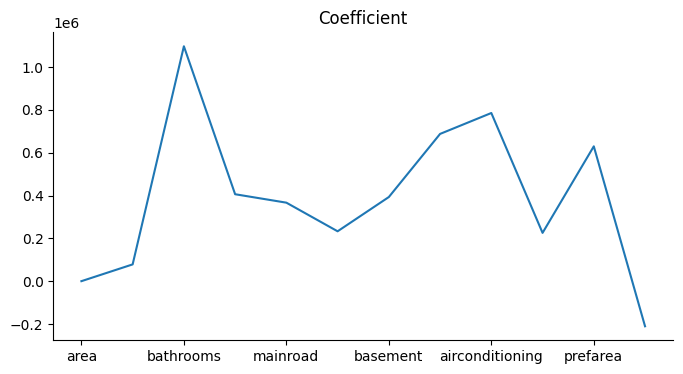

In [ ]:
from matplotlib import pyplot as plt
coeff_df['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

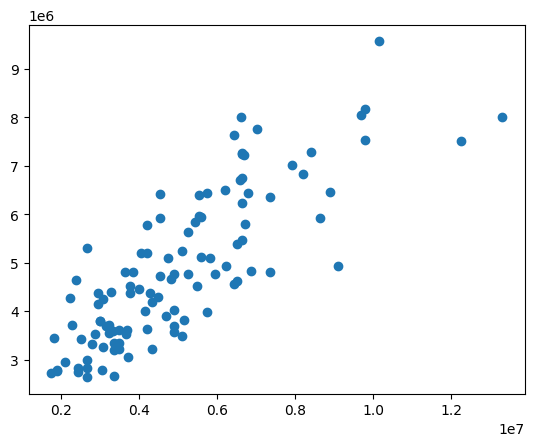

In [ ]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='price'>

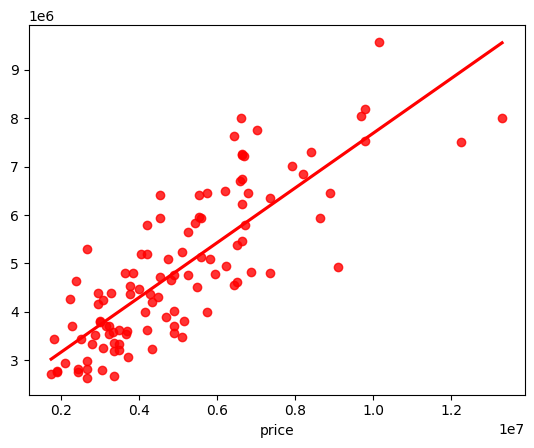

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [ ]:
# 4. Model Evaluation
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Model Performance Metrics:
Mean Squared Error: 1771751116594.04
Root Mean Squared Error: 1331071.42
R-squared Score: 0.65


In [ ]:

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance:
             Feature   Coefficient
2          bathrooms  1.097117e+06
8    airconditioning  7.855506e+05
7    hotwaterheating  6.878813e+05
10          prefarea  6.299017e+05
3            stories  4.062232e+05
6           basement  3.931598e+05
4           mainroad  3.668242e+05
5          guestroom  2.331468e+05
9            parking  2.257565e+05
1           bedrooms  7.857449e+04
0               area  2.358488e+02
11  furnishingstatus -2.103971e+05


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6494754192267803

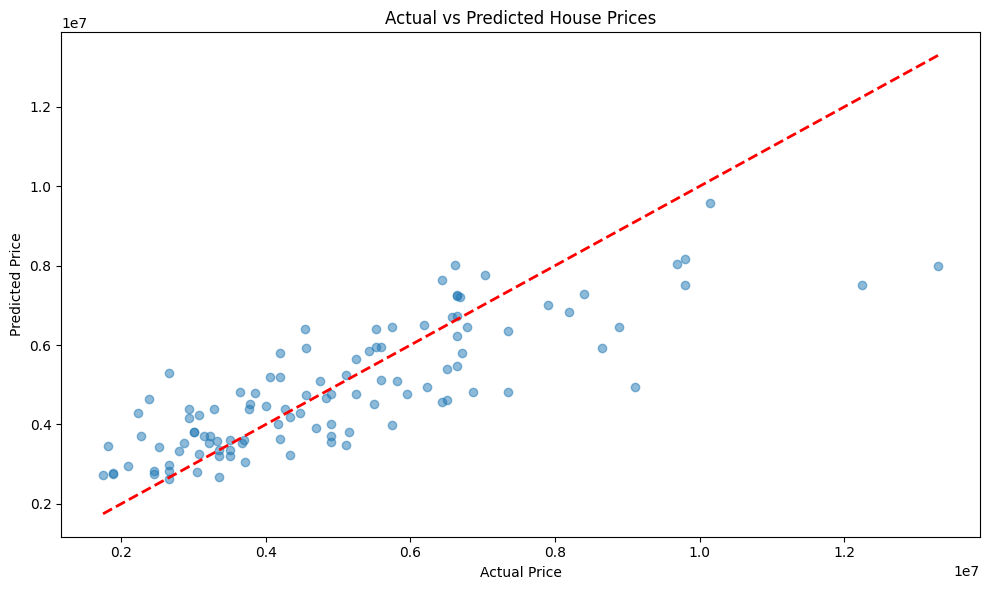

In [ ]:
# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()